In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# task 1

Perform an exploratory data analysis on the Cleveland heart disease dataset described 
above. You can reuse your code from the in-class project. Add at least two new plot types 
like pairplot and/or heatmap from the lecture (e.g. from the seaborn library in python).

In [1]:
import pandas as pd

# reading the file
heart = pd.read_csv("C:/Users/Qba Liu/Documents/STUDIA/BIOINF_MASTER_BERLIN/SEMESTER_I/INTRODUCTION_TO_FOCUS_AREAS/DATA_SCIENCE/LAB/processedWithHeader.cleveland.data")
#hear.head()
#print(heart.shape)

# removing the rows that have missing values denoted by '?'
heart = heart[~(heart=='?').any(axis=1)]
#print(heart.shape)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### checking which variables are continous

In [2]:
# try to find out which variables are cathegorical and which are continouous
# look at how many levels the output variable has

colnames = heart.columns.tolist()
conti_vars = []    # a list to store only the continuous variables

for col in colnames:
    print("variable: {}\n unique values: {}".format(col,heart[col].unique()))
    print("_______________________________________________________________")
    
    # if there are more than 10 unique values in a variable, then mark that variable as contious
    num_vals = len(list(heart[col].unique()))
    if num_vals > 10:
                   conti_vars.append(col)

variable: age
 unique values: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
_______________________________________________________________
variable: sex
 unique values: [1. 0.]
_______________________________________________________________
variable: cp
 unique values: [1. 4. 3. 2.]
_______________________________________________________________
variable: trestbps
 unique values: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
_______________________________________________________________
variable: chol
 unique values: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 1

#### histograms of continous variables (checking for normality, kurtosis, skewness)

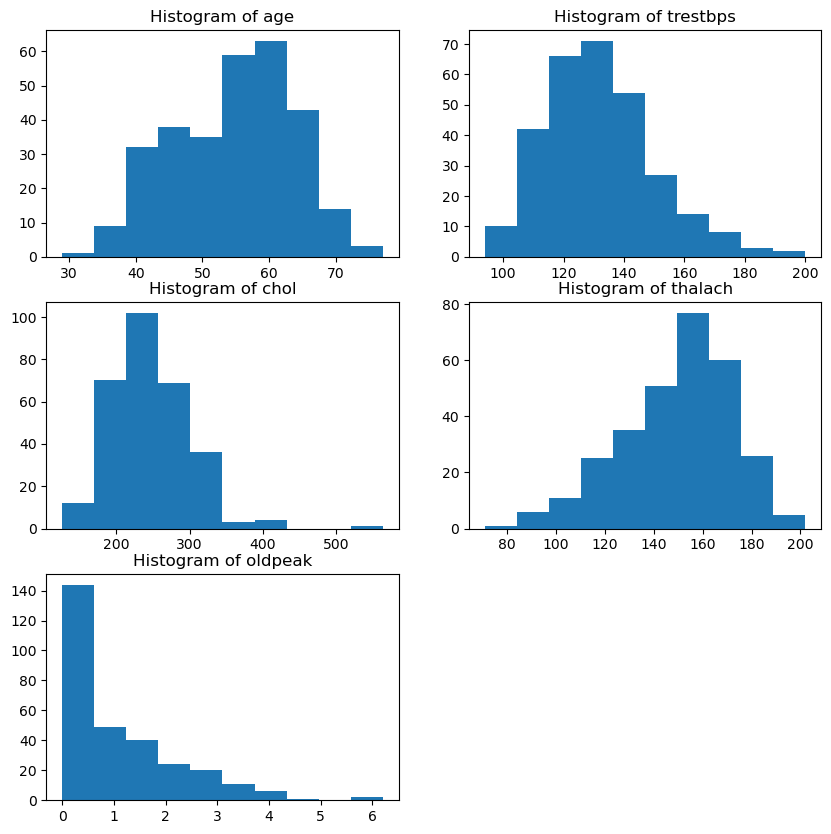

In [3]:
import matplotlib.pyplot as plt
count = 1
plt.figure(figsize = (10,10))
for var in conti_vars:
    plt.subplot(3,2,count)
    plt.hist(heart[var])
    plt.title("Histogram of {}".format(var))
    count = count + 1
    

#### boxplots of continous variables

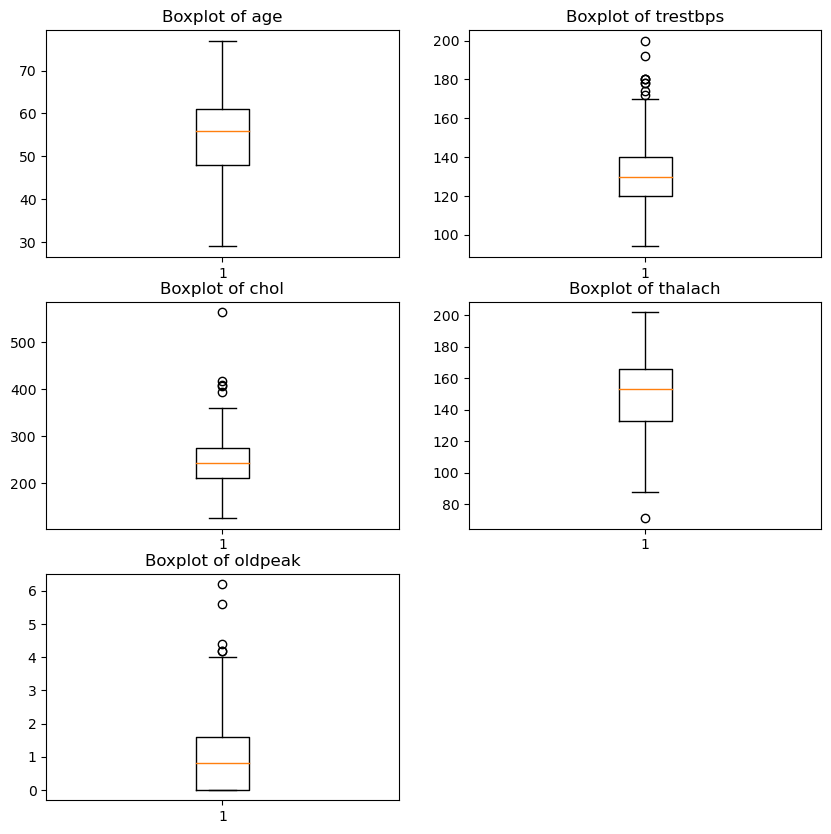

In [4]:
count = 1
plt.figure(figsize = (10,10))

for var in conti_vars:
    plt.subplot(3,2,count)
    plt.boxplot(heart[var])
    plt.title("Boxplot of {}".format(var))
    count = count + 1

#### pairmap

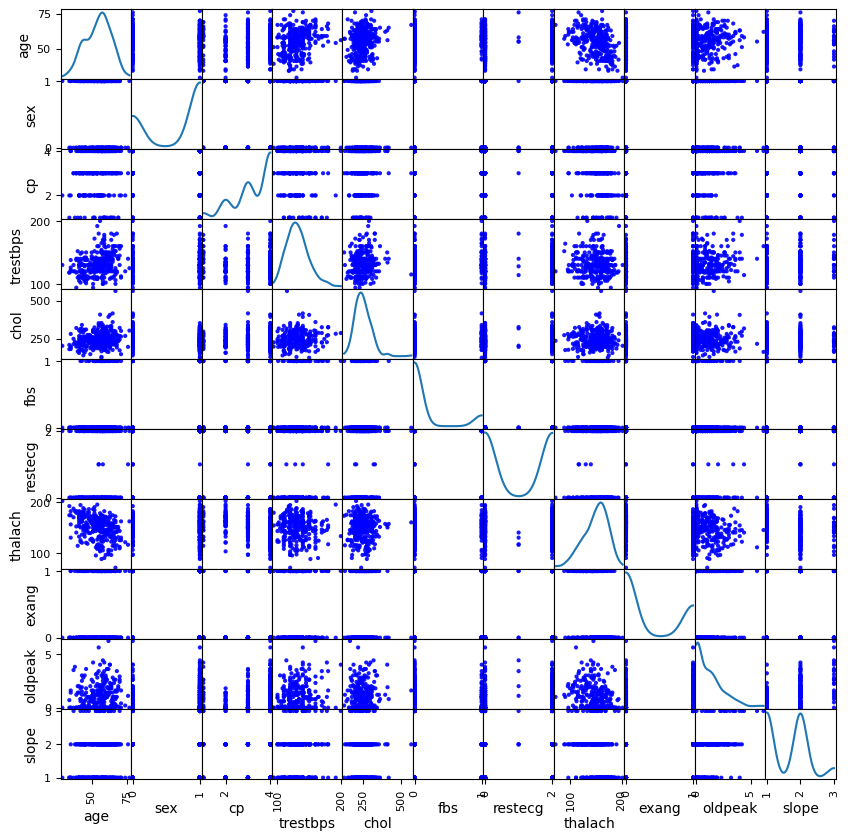

In [5]:
from pandas.plotting import scatter_matrix
heart_small = heart.drop('goal', axis=1)
_ = scatter_matrix(heart_small, alpha = 0.9, figsize = (10, 10), diagonal = 'kde', color = 'blue')

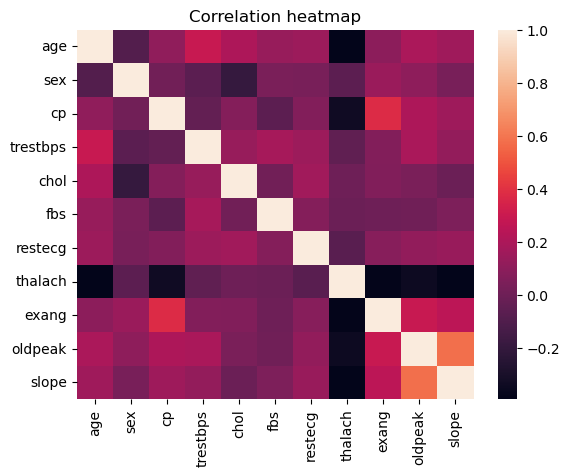

In [6]:
import seaborn as sns

correlation = heart_small.select_dtypes('number').corr()
correlation_heatmap = sns.heatmap(correlation).set(title='Correlation heatmap')

# task 2

Train at least three types of classifiers to diagnose heart disease based on the available data
and compare them visually in a grouped bar chart with regard to accuracy, sensitivity and 
specificity. Create a confusion matrix for each classifier and plot them as a heatmap.

#### prepare the input and output variable arrays

In [7]:
X = heart.drop('goal', axis=1)  # independent variables / features / input variables
y = heart['goal']    # dependent variable / target variable / output variable

#### train test split and scaling

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scaling ------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

##### function to calculate the sensitivity of 5 class prediction

In [9]:
def sensitivity(confusion_matrix):

    FN_class0 = 0
    FN_class1 = 0
    FN_class2 = 0
    FN_class3 = 0
    FN_class4 = 0

    for i in range(0, confusion_matrix.shape[0]):
        for j in range(0, confusion_matrix.shape[1]):
        
            if i == 0:
                if j == 0:
                    TP_class0 = confusion_matrix[i][j]
                else:
                    FN_class0 = FN_class0 + confusion_matrix[i][j]
                
            elif i == 1:
                if j == 0:
                    TP_class1 = confusion_matrix[i][j]
                else:
                    FN_class1 = FN_class1 + confusion_matrix[i][j]
                
            elif i == 2:
                if j == 0:
                    TP_class2 = confusion_matrix[i][j]
                else:
                    FN_class2 = FN_class2 + confusion_matrix[i][j]
                
            elif i == 3:
                if j == 0:
                    TP_class3 = confusion_matrix[i][j]
                else:
                    FN_class3 = FN_class3 + confusion_matrix[i][j]
            else:
                if j == 0:
                    TP_class4 = confusion_matrix[i][j]
                else:
                    FN_class4 = FN_class4 + confusion_matrix[i][j]
                    
    sensitivity = [None]*5
    sensitivity[0] = TP_class0/(TP_class0 + FN_class0)
    sensitivity[1] = TP_class1/(TP_class1 + FN_class1)
    sensitivity[2] = TP_class2/(TP_class2 + FN_class2)
    sensitivity[3] = TP_class3/(TP_class3 + FN_class3)
    sensitivity[4] = TP_class4/(TP_class4 + FN_class4)

    return sensitivity


#### function to caluclate the specificity of a 5 class prediction

In [10]:
def specificity(confusion_matrix):
    for i in range(0, confusion_matrix.shape[0]):
        for j in range(0, confusion_matrix.shape[1]):
            if i == 0:
                FP_class0 = sum(confusion_matrix[1:,i])
                TN_class0 = sum(sum(confusion_matrix[1:,1:]))
                specificity_class0 = TN_class0/(TN_class0+FP_class0)

            elif i == 1:
                FP_class1 = sum(confusion_matrix[:,i]) - confusion_matrix[i,i]
                TN_class1 = sum(sum(confusion_matrix)) - sum(confusion_matrix[:,i]) - sum(confusion_matrix[i,:]) + confusion_matrix[i,i]
                specificity_class1 = TN_class1/(TN_class1 + FP_class1)
                
            elif i == 2:
                FP_class2 = sum(confusion_matrix[:,i]) - confusion_matrix[i,i]
                TN_class2 = sum(sum(confusion_matrix)) - sum(confusion_matrix[:,i]) - sum(confusion_matrix[i,:]) + confusion_matrix[i,i]
                specificity_class2 = TN_class2/(TN_class2 + FP_class2)
            
            elif i == 3:
                FP_class3 = sum(confusion_matrix[:,i]) - confusion_matrix[i,i]
                TN_class3 = sum(sum(confusion_matrix)) - sum(confusion_matrix[:,i]) - sum(confusion_matrix[i,:]) + confusion_matrix[i,i]
                specificity_class3 = TN_class3/(TN_class3 + FP_class3)
                
            else:
                FP_class4 = sum(confusion_matrix[:,4]) - confusion_matrix[4,4]
                TN_class4 = sum(sum(confusion_matrix[:4,:4]))
                specificity_class4 = TN_class4/(TN_class4+FP_class4)
            
    specificity = [None] * 5
    specificity[0] = specificity_class0
    specificity[1] = specificity_class1
    specificity[2] = specificity_class2
    specificity[3] = specificity_class3
    specificity[4] = specificity_class4
    
    return specificity

#### Logistic Regression

Accuracy of Logistic regression classifier on test set: 0.55
Sensitivity: [0.9743589743589743, 0.7333333333333333, 0.25, 0.25, 0.4] "
" Specificity: [0.5277777777777778, 0.9333333333333333, 0.8955223880597015, 0.9104477611940298, 1.0]


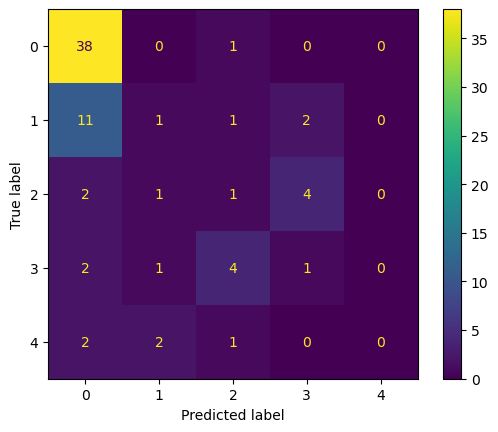

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_hat = pd.Series(logreg.predict(X_test))
    
try:
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=logreg.classes_)
    cm_display.plot()
    #plt.show()
except Exception:
    pass

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

logreg_sensitivity = sensitivity(confusion_matrix)
logreg_specificity = specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(sensitivity(confusion_matrix), specificity(confusion_matrix)))

#### Decision trees

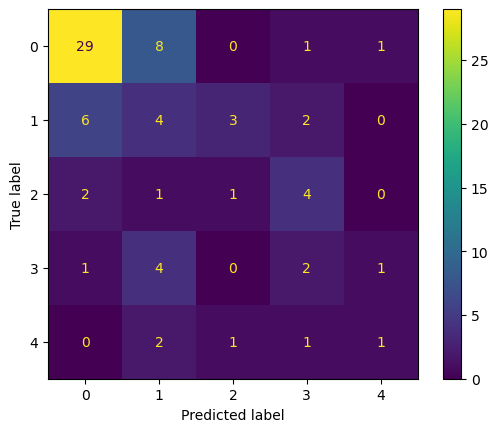

Accuracy of Decision trees classifier on test set: 0.49
Sensitivity: [0.7435897435897436, 0.4, 0.25, 0.125, 0.0] "
" Specificity: [0.75, 0.75, 0.9402985074626866, 0.8805970149253731, 0.9714285714285714]


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_hat = pd.Series(clf.predict(X_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass
print('Accuracy of Decision trees classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

clf_sensitivity = sensitivity(confusion_matrix)
clf_specificity = specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(sensitivity(confusion_matrix), specificity(confusion_matrix)))

#### k-nearest neighbours

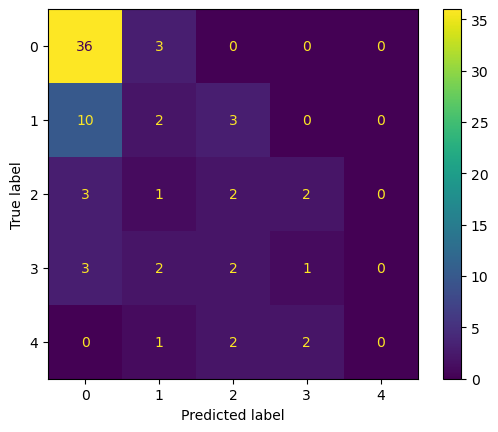

Accuracy of KNN classifier on test set: 0.55
Sensitivity: [0.9230769230769231, 0.6666666666666666, 0.375, 0.375, 0.0] "
" Specificity: [0.5555555555555556, 0.8833333333333333, 0.8955223880597015, 0.9402985074626866, 1.0]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = pd.Series(knn.predict(X_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = knn.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

knn_sensitivity = sensitivity(confusion_matrix)
knn_specificity = specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(sensitivity(confusion_matrix), specificity(confusion_matrix)))

#### LDA (linear discriminant analysis)

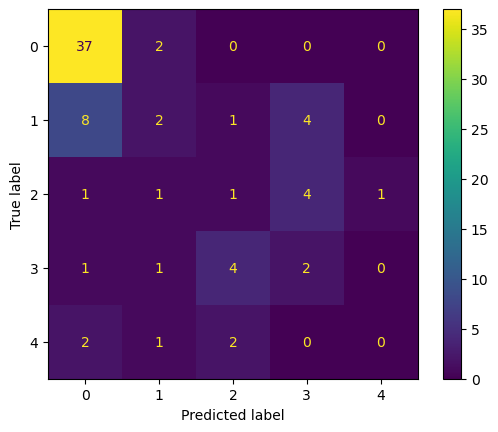

Accuracy of LDA classifier on test set: 0.56
Sensitivity: [0.9487179487179487, 0.5333333333333333, 0.125, 0.125, 0.4] "
" Specificity: [0.6666666666666666, 0.9166666666666666, 0.8955223880597015, 0.8805970149253731, 0.9857142857142858]


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_hat = pd.Series(lda.predict(X_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = lda.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

lda_sensitivity = sensitivity(confusion_matrix)
lda_specificity = specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(sensitivity(confusion_matrix), specificity(confusion_matrix)))

#### Gaussian Naive Bayes

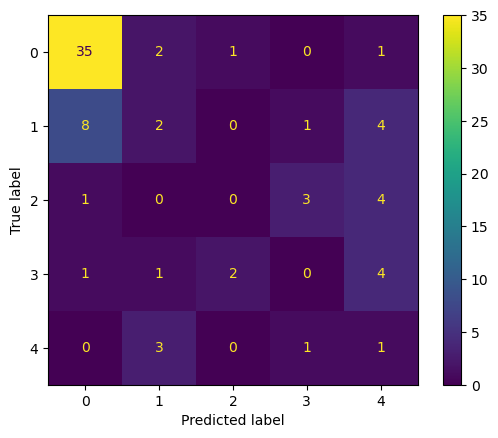

Accuracy of Gaussian Naive Bayes classifier on test set: 0.51
Sensitivity: [0.8974358974358975, 0.5333333333333333, 0.125, 0.125, 0.0] "
" Specificity: [0.7222222222222222, 0.9, 0.9552238805970149, 0.9253731343283582, 0.8142857142857143]


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_hat = pd.Series(gnb.predict(X_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = gnb.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

gnb_sensitivity = sensitivity(confusion_matrix)
gnb_specificity = specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(sensitivity(confusion_matrix), specificity(confusion_matrix)))

#### Support Vector Machine 

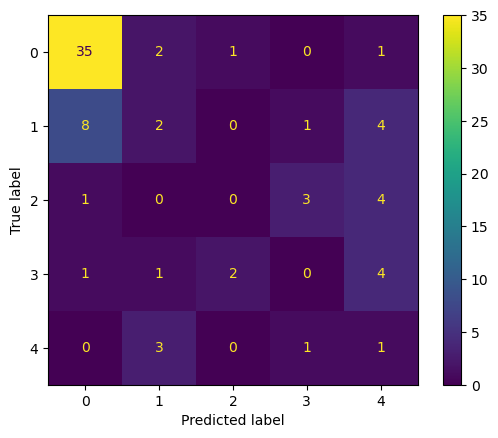

Accuracy of SVM classifier on test set: 0.51
Sensitivity: [0.8974358974358975, 0.5333333333333333, 0.125, 0.125, 0.0] "
" Specificity: [0.7222222222222222, 0.9, 0.9552238805970149, 0.9253731343283582, 0.8142857142857143]


In [16]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
svm = SVC()
svm.fit(X_train, y_train)
y_hat = pd.Series(gnb.predict(X_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = svm.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

svm_sensitivity = sensitivity(confusion_matrix)
svm_specificity = specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(sensitivity(confusion_matrix), specificity(confusion_matrix)))

In [18]:
sensitivity = [logreg_sensitivity, clf_sensitivity, knn_sensitivity, lda_sensitivity, gnb_sensitivity, svm_sensitivity]
specificity = [logreg_specificity, clf_specificity, knn_specificity, lda_specificity, gnb_specificity, svm_specificity]

models = ['Logistic_regression', 'Decision_trees', 'K-nearest-neghbors', 'LDA', 'Gaussian_naive_Bayes', 'SVM']

sensitivity_class0 = []
sensitivity_class1 = []
sensitivity_class2 = []
sensitivity_class3 = []
sensitivity_class4 = []

specificity_class0 = []
specificity_class1 = []
specificity_class2 = []
specificity_class3 = []
specificity_class4 = []

for i in sensitivity:
    sensitivity_class0.append(i[0])
    sensitivity_class1.append(i[1])
    sensitivity_class2.append(i[2])
    sensitivity_class3.append(i[3])
    sensitivity_class4.append(i[4])
    
for i in specificity:
    specificity_class0.append(i[0])
    specificity_class1.append(i[1])
    specificity_class2.append(i[2])
    specificity_class3.append(i[3])
    specificity_class4.append(i[4])
    


#### sensitivity of the models by prediction class

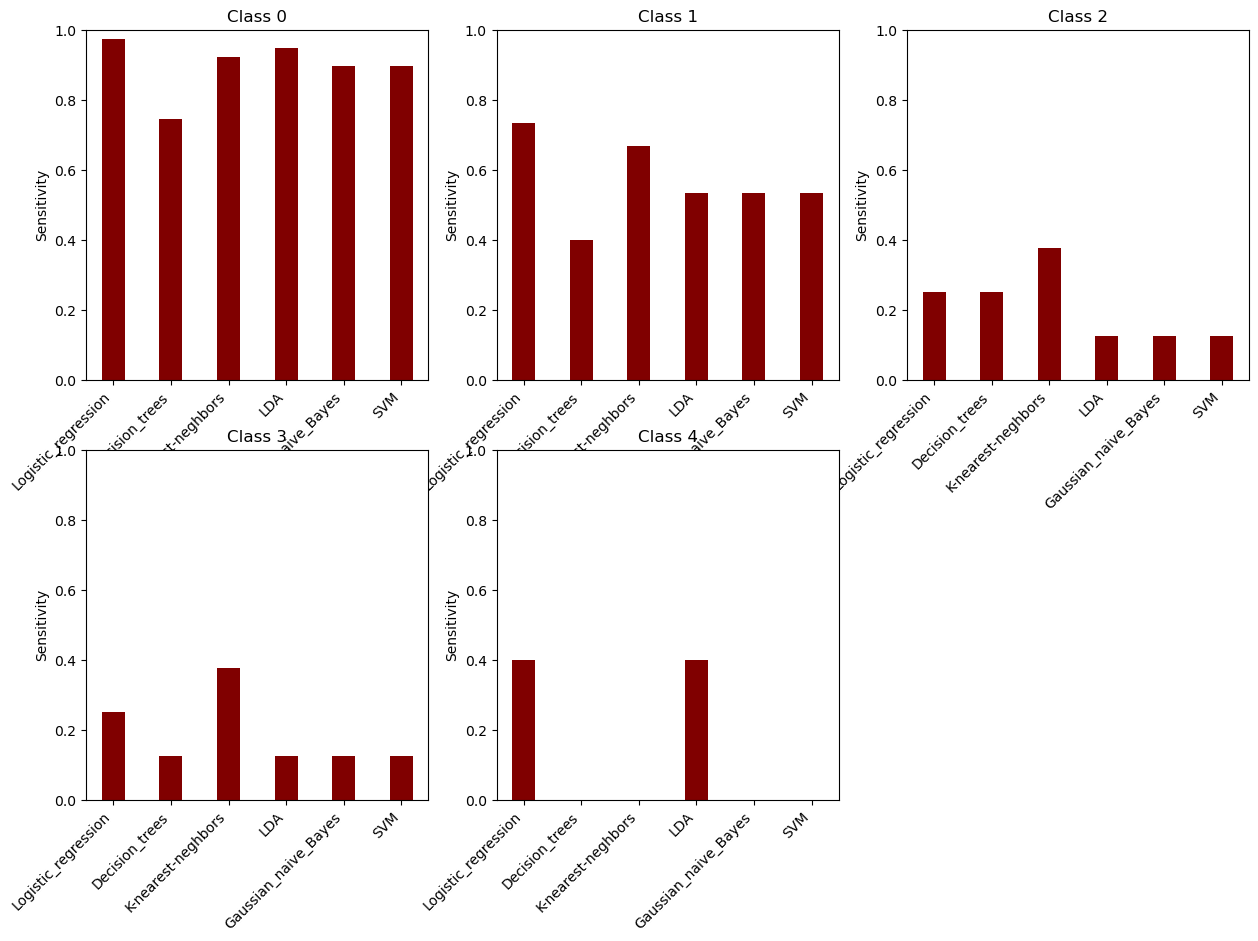

In [19]:
fig = plt.figure(figsize = (15, 10))
 
plt.subplot(2,3,1)
plt.bar(models, sensitivity_class0, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Sensitivity")
plt.ylim(0,1)
plt.title("Class 0")

plt.subplot(2,3,2)
plt.bar(models, sensitivity_class1, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Sensitivity")
plt.ylim(0,1)
plt.title("Class 1")

plt.subplot(2,3,3)
plt.bar(models, sensitivity_class2, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Sensitivity")
plt.ylim(0,1)
plt.title("Class 2")

plt.subplot(2,3,4)
plt.bar(models, sensitivity_class3, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Sensitivity")
plt.ylim(0,1)
plt.title("Class 3")

plt.subplot(2,3,5)
plt.bar(models, sensitivity_class4, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Sensitivity")
plt.ylim(0,1)
plt.title("Class 4")

plt.show()

#### specificity of the models by prediction class

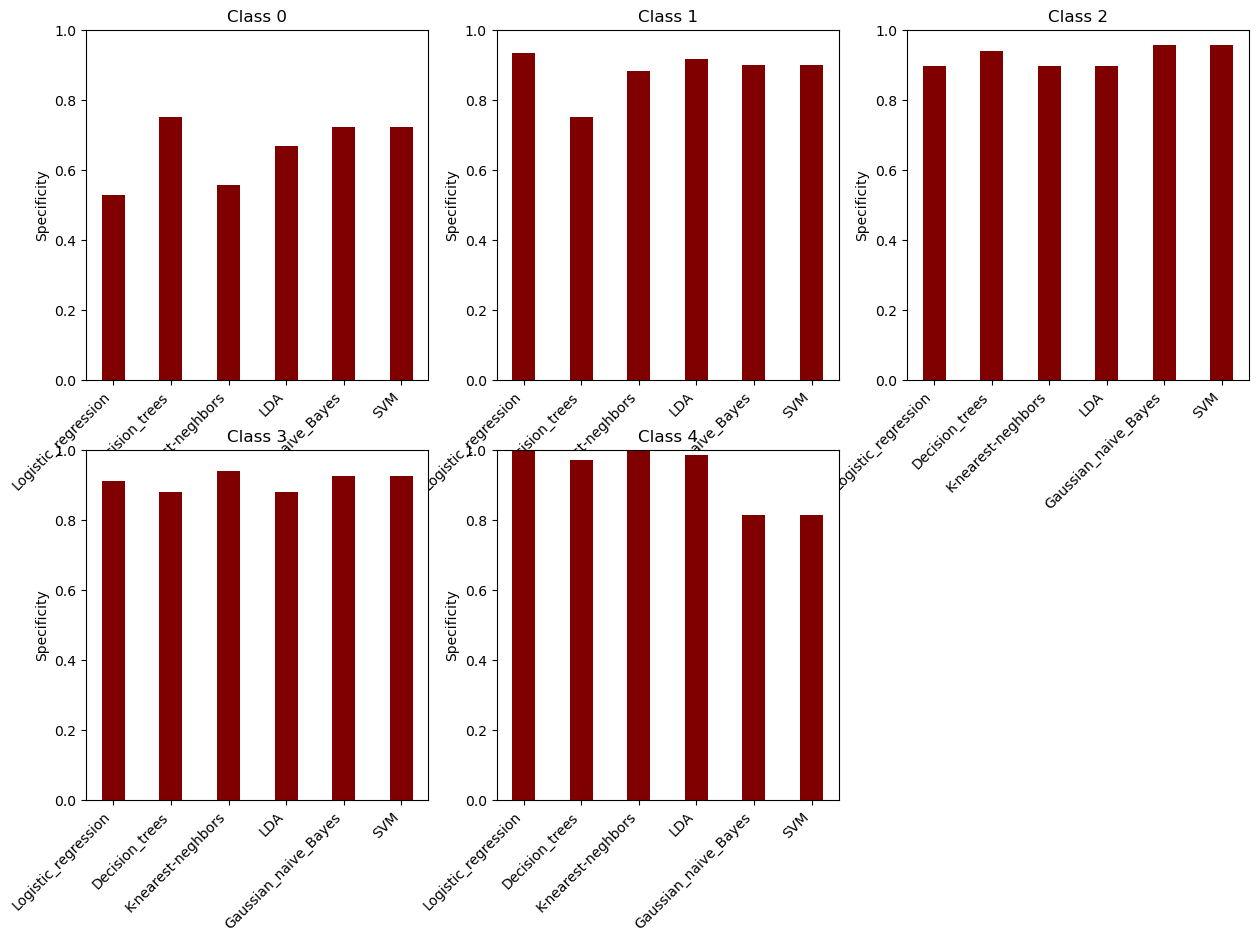

In [20]:
fig = plt.figure(figsize = (15, 10))
 
plt.subplot(2,3,1)
plt.bar(models, specificity_class0, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Specificity")
plt.ylim(0,1)
plt.title("Class 0")

plt.subplot(2,3,2)
plt.bar(models, specificity_class1, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Specificity")
plt.ylim(0,1)
plt.title("Class 1")

plt.subplot(2,3,3)
plt.bar(models, specificity_class2, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Specificity")
plt.ylim(0,1)
plt.title("Class 2")

plt.subplot(2,3,4)
plt.bar(models, specificity_class3, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Specificity")
plt.ylim(0,1)
plt.title("Class 3")

plt.subplot(2,3,5)
plt.bar(models, specificity_class4, color ='maroon', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylabel("Specificity")
plt.ylim(0,1)
plt.title("Class 4")

plt.show()

# Task 3

Repeat the steps of the previous task using as class labels only “heart disease vs. no heart 
disease”. Why does this change make sense?

This change makes sense, because the numbers of records for each class are not balanced, there are around 50 patients with no heart disease and around 10 patience with each intensity of the heart disease. Moreover some models like Logistic Regression are built for 2 class prediction and are not optimal for multi class prediciton. From a clinical point of view the distinguishment between healthy and sick is more straighforward, then the division into smaller subclasses.

# Taks 4

The ROC curves for task 4 are in within the answers to the 3rd task.

In [28]:
#heart["goal"].unique()
heart_new = heart
heart_new['goal'] = heart_new['goal'].replace([1,2,3,4], 1)

# 0 --> no heart disease
# 1 --> heart disease

#heart_new['goal'].unique()

In [29]:
X_new = heart_new.drop('goal', axis=1)  # independent variables / features / input variables
y_new = heart_new['goal']    # dependent variable / target variable / output variable

In [30]:
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, random_state=0)

# scaling ------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

In [51]:
def binary_sensitivity(confusion_matrix):
    TP = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    sensitivity = TP/(TP + FN)
    return sensitivity

In [52]:
def binary_specificity(confusion_matrix):
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    specificity = TN/(TN+FP)
    return specificity

#### Logistic Regression

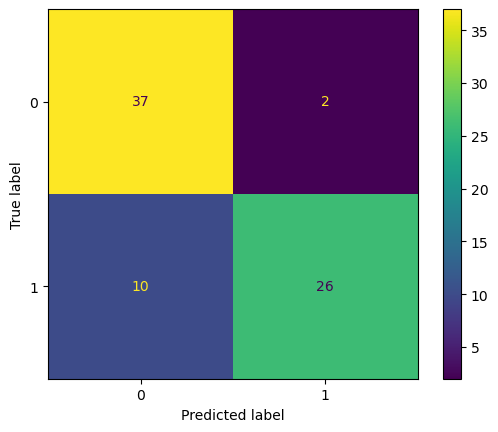

Accuracy of Logistic regression classifier on test set: 0.84
Sensitivity: 0.7222222222222222 "
" Specificity: 0.9487179487179487


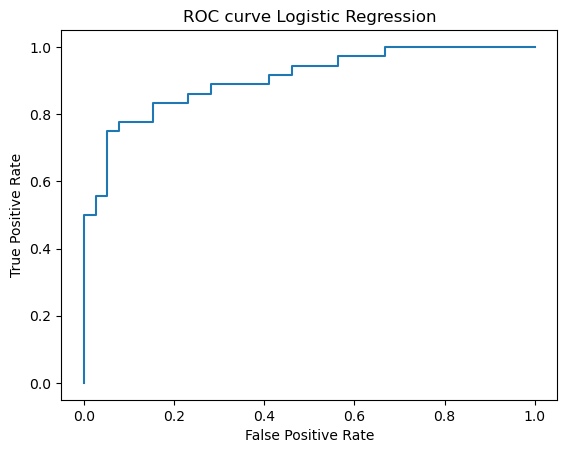

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
logreg = LogisticRegression()
logreg.fit(X_new_train, y_new_train)
y_new_hat = pd.Series(logreg.predict(X_new_test))
    
try:
    confusion_matrix = metrics.confusion_matrix(y_new_test, y_new_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=logreg.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

logreg_bin_sensitivity = binary_sensitivity(confusion_matrix)
logreg_bin_specificity = binary_specificity(confusion_matrix)

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_new_test, y_new_test)))

print('Sensitivity: {} "\n" Specificity: {}'.format(binary_sensitivity(confusion_matrix), binary_specificity(confusion_matrix)))

# ROC curve
y_pred_proba = logreg.predict_proba(X_new_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_new_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Decision trees

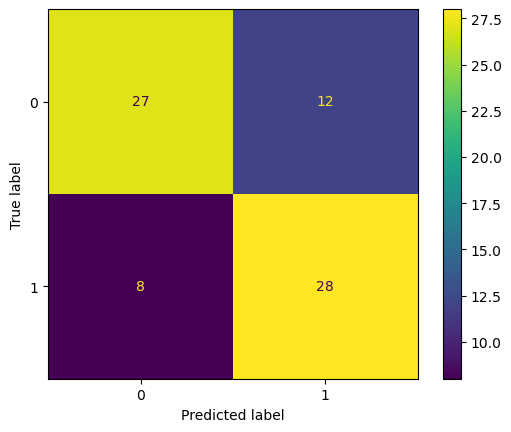

Accuracy of Decision trees classifier on test set: 0.73
Sensitivity: 0.7777777777777778 "
" Specificity: 0.6923076923076923


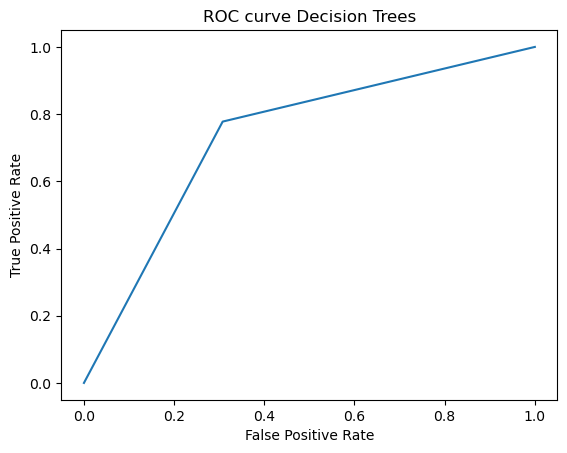

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier().fit(X_new_train, y_new_train)
y_new_hat = pd.Series(clf.predict(X_new_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_new_test, y_new_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass
print('Accuracy of Decision trees classifier on test set: {:.2f}'
     .format(clf.score(X_new_test, y_new_test)))

clf_bin_sensitivity = binary_sensitivity(confusion_matrix)
clf_bin_specificity = binary_specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(binary_sensitivity(confusion_matrix), binary_specificity(confusion_matrix)))

# ROC curve
y_pred_proba = clf.predict_proba(X_new_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_new_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve Decision Trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### k-nearest neighbours

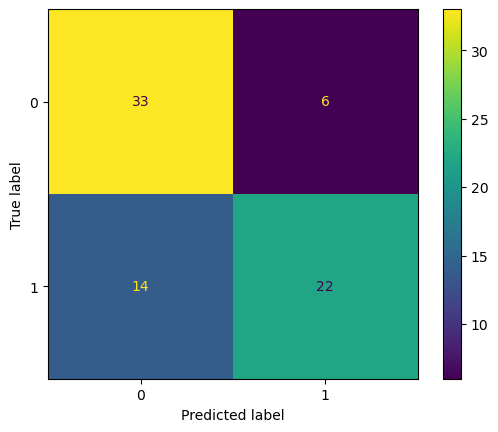

Accuracy of KNN classifier on test set: 0.73
Sensitivity: 0.6111111111111112 "
" Specificity: 0.8461538461538461


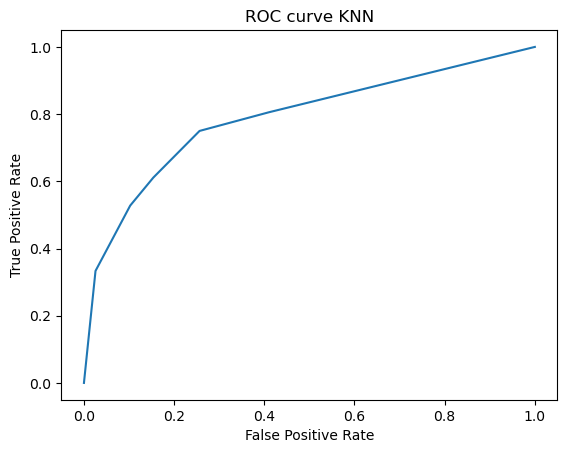

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
knn = KNeighborsClassifier()
knn.fit(X_new_train, y_new_train)
y_new_hat = pd.Series(knn.predict(X_new_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_new_test, y_new_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = knn.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_new_test, y_new_test)))

knn_bin_sensitivity = binary_sensitivity(confusion_matrix)
knn_bin_specificity = binary_specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(binary_sensitivity(confusion_matrix), binary_specificity(confusion_matrix)))

# ROC curve
y_pred_proba = knn.predict_proba(X_new_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_new_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve KNN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### LDA 

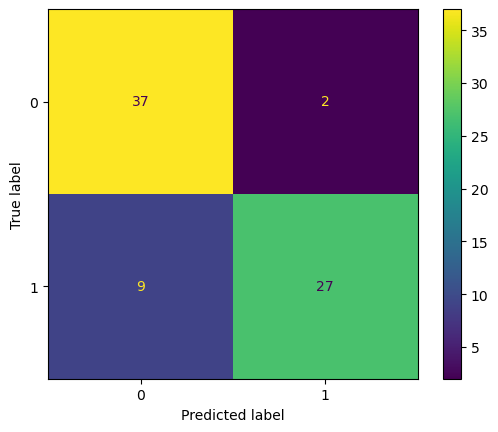

Accuracy of LDA classifier on test set: 0.85
Sensitivity: 0.75 "
" Specificity: 0.9487179487179487


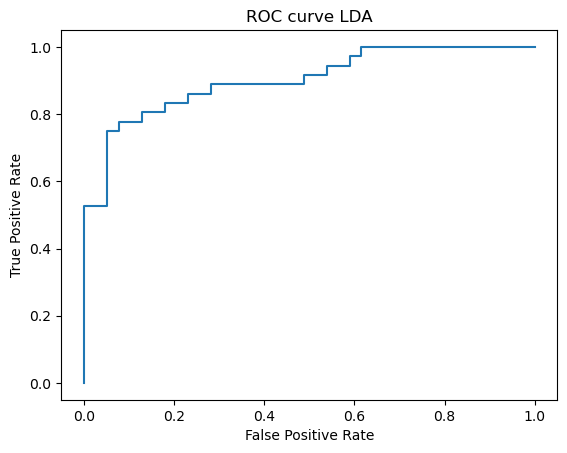

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt
lda = LinearDiscriminantAnalysis()
lda.fit(X_new_train, y_new_train)
y_new_hat = pd.Series(lda.predict(X_new_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_new_test, y_new_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = lda.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_new_test, y_new_test)))

lda_bin_sensitivity = binary_sensitivity(confusion_matrix)
lda_bin_specificity = binary_specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(binary_sensitivity(confusion_matrix), binary_specificity(confusion_matrix)))

# ROC curve
y_pred_proba = lda.predict_proba(X_new_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_new_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve LDA')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Gaussian Naive Bayes

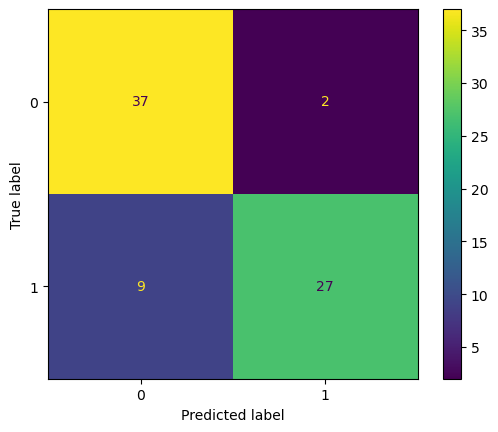

Accuracy of Gaussian Naive Bayes classifier on test set: 0.85
Sensitivity: 0.75 "
" Specificity: 0.9487179487179487


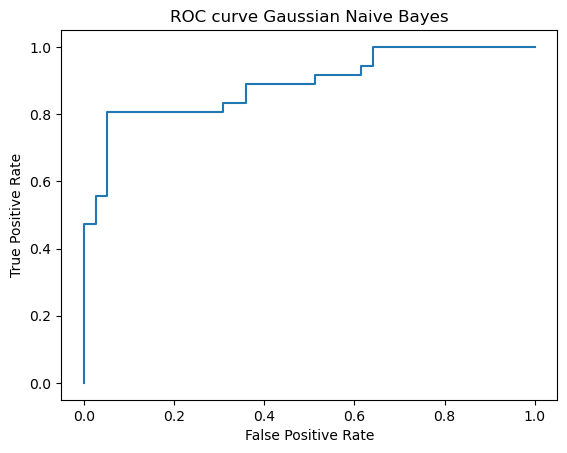

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
gnb = GaussianNB()
gnb.fit(X_new_train, y_new_train)
y_new_hat = pd.Series(gnb.predict(X_new_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_new_test, y_new_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = gnb.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'
     .format(gnb.score(X_new_test, y_new_test)))

gnb_bin_sensitivity = binary_sensitivity(confusion_matrix)
gnb_bin_specificity = binary_specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(binary_sensitivity(confusion_matrix), binary_specificity(confusion_matrix)))

# ROC curve
y_pred_proba = gnb.predict_proba(X_new_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_new_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve Gaussian Naive Bayes')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Support Vector Machines

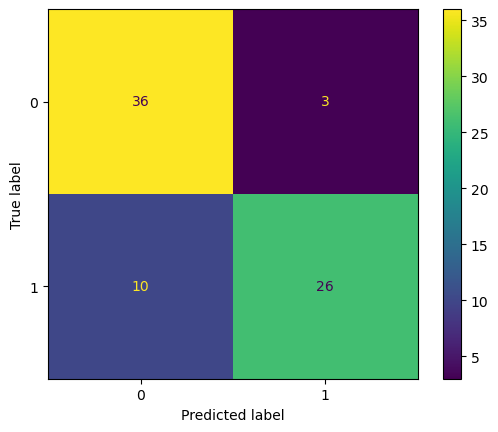

Accuracy of SVM classifier on test set: 0.83
Sensitivity: 0.7222222222222222 "
" Specificity: 0.9230769230769231


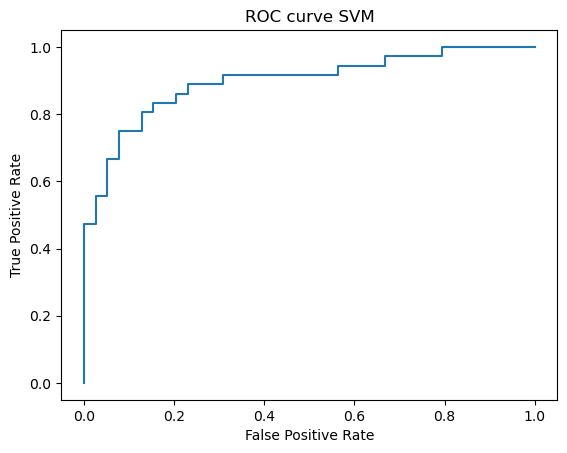

In [88]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
svm = SVC(probability = True)
svm.fit(X_new_train, y_new_train)
y_new_hat = pd.Series(svm.predict(X_new_test))

try:
    confusion_matrix = metrics.confusion_matrix(y_new_test, y_new_hat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = svm.classes_)
    cm_display.plot()
    plt.show()
except Exception:
    pass

print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_new_test, y_new_test)))

svm_bin_sensitivity = binary_sensitivity(confusion_matrix)
svm_bin_specificity = binary_specificity(confusion_matrix)

print('Sensitivity: {} "\n" Specificity: {}'.format(binary_sensitivity(confusion_matrix), binary_specificity(confusion_matrix)))

# ROC curve
y_pred_proba = svm.predict_proba(X_new_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_new_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
sensitivity = [logreg_bin_sensitivity, clf_bin_sensitivity, knn_bin_sensitivity, lda_bin_sensitivity, gnb_bin_sensitivity, svm_bin_sensitivity]
specificity = [logreg_bin_specificity, clf_bin_specificity, knn_bin_specificity, lda_bin_specificity, gnb_bin_specificity, svm_bin_specificity]
models = ['Logistic_regression', 'Decision_trees', 'K-nearest-neghbors', 'LDA', 'Gaussian_naive_Bayes', 'SVM']

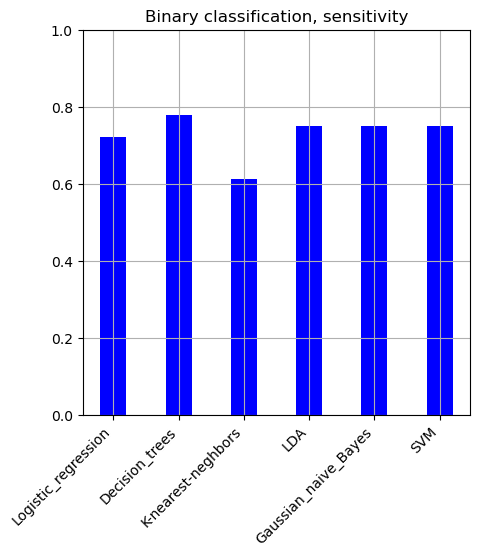

In [69]:
plt.figure(figsize = (5,5))
plt.bar(models, sensitivity, color = 'blue', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylim(0,1)
plt.grid()
plt.title("Binary classification, sensitivity")
plt.show()

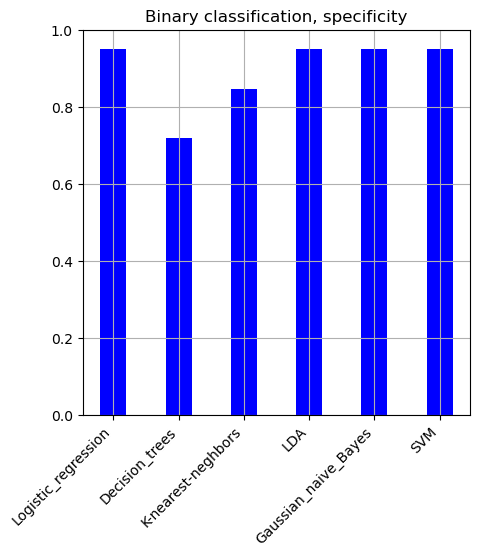

In [70]:
plt.figure(figsize = (5,5))
plt.bar(models, specificity, color = 'blue', width = 0.4)
plt.xticks(range(len(models)), models, rotation=45, ha = "right")
plt.ylim(0,1)
plt.grid()
plt.title("Binary classification, specificity")
plt.show()